In [1]:
import pandas as pd
import numpy as np

housing = pd.read_csv('D:/upgrad/ML/Housing.csv')

## Data Understanding

In [2]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


## Data Preparation

Need to convert the categorical data to numerical for LR modelling.
Many variables have yes or no so mapping them to 1 or 0.

In [4]:
"""
Method that converts yes/no columns into 1/0

@author Aryan Singh
"""
def convert_boolean_to_numeric(df):
    cols = df.columns
    num_cols = df._get_numeric_data().columns
    cat_variables = list(set(cols) - set(num_cols))
    for variable in df:
        var = str(variable)
        if((var in cat_variables) & ((df[variable][0] == 'yes') | (df[variable][0] == 'no'))):
            df[var] = df[var].map({ 'yes': 1, 'no': 0})

In [5]:
convert_boolean_to_numeric(housing)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null int64
guestroom           545 non-null int64
basement            545 non-null int64
hotwaterheating     545 non-null int64
airconditioning     545 non-null int64
parking             545 non-null int64
prefarea            545 non-null int64
furnishingstatus    545 non-null object
dtypes: int64(12), object(1)
memory usage: 55.4+ KB


In [7]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [8]:
def convert_categorical_to_numeric(df):
    cols = df.columns
    num_cols = df._get_numeric_data().columns
    cat_variables = list(set(cols) - set(num_cols))
    for variable in df:
        if(str(variable) in cat_variables):
            var_dummy = pd.get_dummies(df[variable], drop_first=True)
            df = pd.concat([df, var_dummy], axis=1)
            df.drop([variable], axis=1, inplace=True)
    return df

In [9]:
housing = convert_categorical_to_numeric(housing)

In [10]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
price              545 non-null int64
area               545 non-null int64
bedrooms           545 non-null int64
bathrooms          545 non-null int64
stories            545 non-null int64
mainroad           545 non-null int64
guestroom          545 non-null int64
basement           545 non-null int64
hotwaterheating    545 non-null int64
airconditioning    545 non-null int64
parking            545 non-null int64
prefarea           545 non-null int64
semi-furnished     545 non-null uint8
unfurnished        545 non-null uint8
dtypes: int64(12), uint8(2)
memory usage: 52.2 KB


## Creating derived variables

In [12]:
housing['areaperbedroom'] = housing['area']/housing['bedrooms']

In [13]:
housing['bbratio'] = housing['bathrooms']/housing['bedrooms']

In [14]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


## Rescaling the features

In [15]:
def normalise(x):
    return ((x-np.mean(x))/(max(x)-min(x)))

In [16]:
housing = housing.apply(normalise)

In [17]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,0.738811,0.155977,0.206972,0.237920,0.398165,0.141284,-0.177982,-0.350459,-0.045872,0.684404,0.435474,0.765138,-0.416514,-0.326606,0.005652,0.064367
1,0.647902,0.261818,0.206972,0.904587,0.731498,0.141284,-0.177982,-0.350459,-0.045872,0.684404,0.768807,-0.234862,-0.416514,-0.326606,0.067559,0.664367
2,0.647902,0.330547,0.006972,0.237920,0.064832,0.141284,-0.177982,0.649541,-0.045872,-0.315596,0.435474,0.765138,0.583486,-0.326606,0.241220,0.264367
3,0.644872,0.161475,0.206972,0.237920,0.064832,0.141284,-0.177982,0.649541,-0.045872,0.684404,0.768807,0.765138,-0.416514,-0.326606,0.008868,0.064367
4,0.575175,0.155977,0.206972,-0.095413,0.064832,0.141284,0.822018,0.649541,-0.045872,0.684404,0.435474,-0.234862,-0.416514,-0.326606,0.005652,-0.235633


## Splitting into train and test dataset

In [18]:
X = housing.loc[:, housing.columns != 'price']
y = housing['price']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=100)

## Build a linear model

In [21]:
# from sklearn.linear_model import LinearRegression

# lr=LinearRegression()

# lr.fit(X_train,y_train)

In [22]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
lm_l = sm.OLS(y_train,X_train).fit()

In [23]:
print(lm_l.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Sat, 09 Jun 2018   Prob (F-statistic):           4.56e-82
Time:                        07:07:43   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0022      0.005     

## Calculate VIF to identify unnecessary variables

In [24]:
"""
Calculates VIF for the dependent variables

@Author Aryan Singh
"""

def vif_cal(input_df, dependent_var):
    dep_df = input_df.drop(dependent_var, inplace=False, axis=1)
    vif_df = pd.DataFrame(columns = [ 'Var', 'Vif']);
    i=0
    for var in dep_df:
        y_vars = dep_df[var]
        x_vars = dep_df.drop(var, inplace=False, axis=1)
        r2s = sm.OLS(y_vars, x_vars).fit().rsquared
        vif = round(1/(1-r2s),2)
        vif_df.loc[i] = [var,vif]
        i+=1
    return vif_df.sort_values(by = 'Vif', ascending = False, inplace = False)

In [25]:
vif_cal(input_df = housing, dependent_var='price')

,Var,Vif
2,bathrooms,20.21
14,bbratio,19.04
13,areaperbedroom,17.59
0,area,16.00
1,bedrooms,9.11
12,unfurnished,1.68
11,semi-furnished,1.59
3,stories,1.51
6,basement,1.33
5,guestroom,1.23


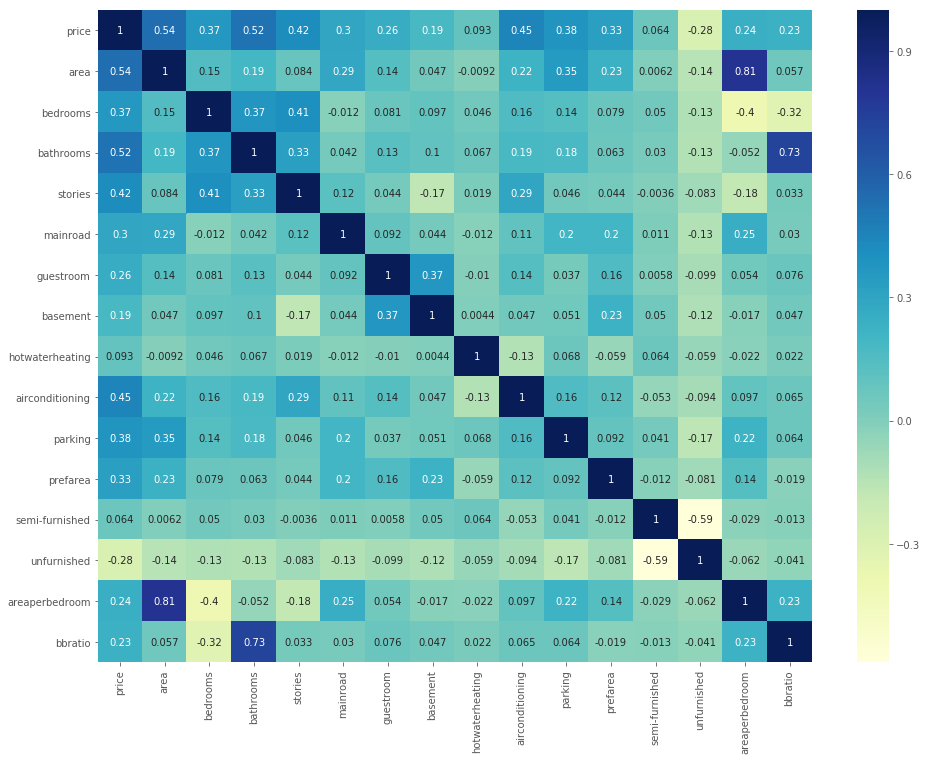

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

plt.figure(figsize=(16,12))
sns.heatmap(housing.corr(), annot=True, cmap="YlGnBu")

## Dropping The Variables And Update the Model

In [31]:
X_train = X_train.drop('bbratio', axis=1)

ValueError: labels ['bbratio'] not contained in axis

In [29]:
lsm_2 = sm.OLS(y_train,X_train).fit()
print(lsm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Sat, 09 Jun 2018   Prob (F-statistic):           6.46e-83
Time:                        08:19:11   Log-Likelihood:                 384.31
No. Observations:                 381   AIC:                            -738.6
Df Residuals:                     366   BIC:                            -679.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0022      0.005     

In [32]:
vif_cal(input_df = housing.drop('bbratio', axis=1), dependent_var='price')

,Var,Vif
13,areaperbedroom,14.14
0,area,12.84
1,bedrooms,4.99
12,unfurnished,1.68
11,semi-furnished,1.59
3,stories,1.50
6,basement,1.32
2,bathrooms,1.29
5,guestroom,1.22
9,parking,1.22


Bedreooms has high P value as well as high VIF so lets drop it

In [33]:
X_train = X_train.drop('bedrooms', axis=1)

In [36]:
lsm_2 = sm.OLS(y_train,X_train).fit()
print(lsm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     61.23
Date:                Sat, 09 Jun 2018   Prob (F-statistic):           1.66e-83
Time:                        08:31:52   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -739.1
Df Residuals:                     367   BIC:                            -683.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0021      0.005     

In [35]:
vif_cal(input_df = housing.drop(['bbratio','bedrooms'], axis=1), dependent_var='price')

,Var,Vif
0,area,4.21
12,areaperbedroom,3.88
11,unfurnished,1.67
10,semi-furnished,1.58
2,stories,1.49
5,basement,1.32
1,bathrooms,1.29
8,parking,1.22
4,guestroom,1.21
7,airconditioning,1.21


P value should not be greater than .01

looking at guestroom, basement, semi-furnished and areaperbedroom

In [37]:
X_train = X_train.drop('areaperbedroom', axis=1)

In [38]:
lsm_2 = sm.OLS(y_train,X_train).fit()
print(lsm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Sat, 09 Jun 2018   Prob (F-statistic):           2.35e-83
Time:                        08:32:19   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0013      0.005     

In [39]:
vif_cal(input_df = housing.drop(['bbratio','bedrooms','areaperbedroom'], axis=1), dependent_var='price')

,Var,Vif
11,unfurnished,1.67
10,semi-furnished,1.58
0,area,1.32
2,stories,1.30
5,basement,1.30
1,bathrooms,1.22
4,guestroom,1.21
7,airconditioning,1.21
8,parking,1.21
3,mainroad,1.16


VIF is less than 2 it is stable now

In [41]:
X_train = X_train.drop('semi-furnished', axis=1)

In [42]:
lsm_2 = sm.OLS(y_train,X_train).fit()
print(lsm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sat, 09 Jun 2018   Prob (F-statistic):           2.73e-84
Time:                        08:34:53   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0013      0.005     

In [43]:
vif_cal(input_df = housing.drop(['bbratio','bedrooms','areaperbedroom', 'semi-furnished'], axis=1), dependent_var='price')

,Var,Vif
0,area,1.32
2,stories,1.30
5,basement,1.30
1,bathrooms,1.22
4,guestroom,1.21
8,parking,1.21
7,airconditioning,1.20
3,mainroad,1.15
9,prefarea,1.15
10,unfurnished,1.07


In [44]:
X_train = X_train.drop('basement', axis=1)

lsm_2 = sm.OLS(y_train,X_train).fit()
print(lsm_2.summary())

vif_cal(input_df = housing.drop(['bbratio','bedrooms','areaperbedroom', 'semi-furnished', 'basement'], axis=1), dependent_var='price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Sat, 09 Jun 2018   Prob (F-statistic):           3.13e-84
Time:                        08:37:03   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0015      0.005     

,Var,Vif
0,area,1.31
2,stories,1.22
7,parking,1.21
1,bathrooms,1.20
6,airconditioning,1.20
3,mainroad,1.15
8,prefarea,1.10
4,guestroom,1.07
9,unfurnished,1.06
5,hotwaterheating,1.04


## Making predictions using Model

In [46]:
X_test_m6 = sm.add_constant(X_test)

In [47]:
X_test_m6 = X_test_m6.drop(['bbratio','bedrooms','areaperbedroom', 'semi-furnished', 'basement'], axis=1)

In [48]:
y_pred = lsm_2.predict(X_test_m6)

## Evaluate The Model

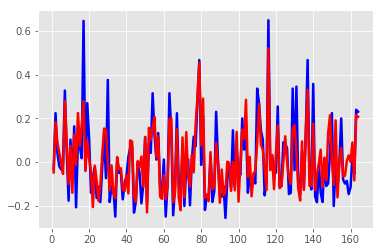

In [50]:
c = [i for i in range(1,165,1)]

fig = plt.figure()
plt.plot(c, y_test,linewidth=2.5, linestyle="-", color = 'blue')
plt.plot(c, y_pred,linewidth=2.5, linestyle="-", color = 'red')

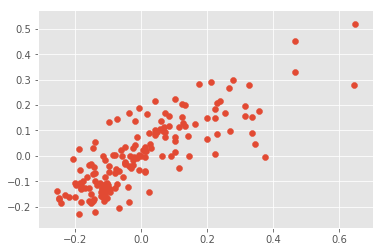

In [51]:
fig = plt.figure()
plt.scatter(y_test,y_pred)

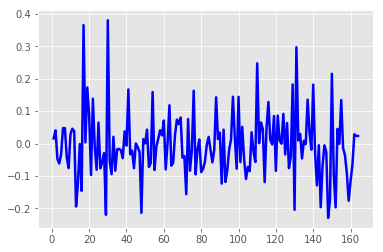

In [52]:
fig = plt.figure()
plt.plot(c, y_test-y_pred,linewidth=2.5, linestyle="-", color = 'blue')

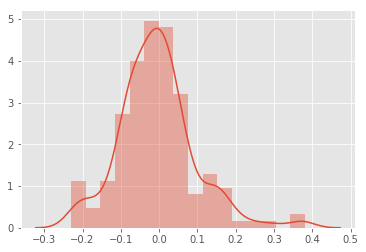

In [53]:
fig = plt.figure()
sns.distplot(y_test-y_pred)

In [54]:
import numpy as np
from sklearn import metrics

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE:  0.10001092336807829
